In [2]:
import numpy as np
import pylab as plt

In [3]:
lattice = 10

particle_site = 1

state0= particle_site*np.ones(lattice)

In [4]:
def d_dag(l, state):
    d0 = np.zeros(lattice)
    d0[l] = -1.
    if l < len(d0) - 1:
        d0[l + 1] = 1.
    else:
        d0[0] = 1.  # Consider the first element as the next for the last element

    return d0 + state


def d(l,state):
    d0= np.zeros(lattice)
    d0[l]= 1.
    if l<len(d0)-1:
        d0[l+1]= -1.
    if l==len(d0)-1:
        d0[0]=-1.
    
    return d0+state

In [5]:
def pos_state0(state):
    pos_state0=[]
    for i in range(1):
        pos_state0.append(state)
    return pos_state0


def pos_states1(state):
    # all possible one dipole states cor. to d dag
    pos_state1=[]
    for i in range(len(state)):
        pos_state1.append(d_dag(i,state))
    
    return pos_state1


def pos_states2(state):

    pos_state2 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <=  lattice -2:
                state2 = d_dag(j, state1)

                # Check if state2 has already been added
                state2_tuple = tuple(state2)
                if state2_tuple not in added_states:
                    added_states.add(state2_tuple)
                    pos_state2.append(state2)

    return pos_state2

def pos_states3(state):

    pos_state3 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <= lattice-2:
                state2 = d_dag(j, state1)

                for k in range(len(state)):
                    if np.abs(j-k) >= 2.0 and np.abs(j-k) <=lattice - 2:
                        if np.abs(i-k) >= 2.0 and np.abs(i-k) <=lattice - 2:
                            state3 = d_dag(k,state2)

                            # Check if state2 is not an array of zeros
                            if not np.all(state3 == 0):
                                state3_tuple = tuple(state3)
                                if state3_tuple not in added_states:
                                    added_states.add(state3_tuple)
                                    pos_state3.append(state3)

    return pos_state3


def pos_states4(state):

    pos_state4 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <= lattice-2:
                state2 = d_dag(j, state1)

                for k in range(len(state)):
                    if np.abs(j-k) >= 2.0 and np.abs(j-k) <=lattice - 2:
                        if np.abs(i-k) >= 2.0 and np.abs(i-k) <=lattice - 2:
                            state3 = d_dag(k,state2)

                            for m in range(len(state)):
                                if np.abs(k-m) >= 2.0 and np.abs(k-m) <=lattice - 2:
                                    if np.abs(j-m) >= 2.0 and np.abs(j-m) <=lattice - 2:
                                        if np.abs(i-m) >= 2.0 and np.abs(i-m) <=lattice - 2:
                                            state4 = d_dag(m,state3)


                                            # Check if state2 has already been added
                                            state4_tuple = tuple(state4)
                                            if state4_tuple not in added_states:
                                                added_states.add(state4_tuple)
                                                pos_state4.append(state4)

    return pos_state4


def pos_states5(state):

    pos_state5 = []
    added_states = set()

    for i in range(len(state)):
        state1 = d_dag(i, state)

        for j in range(len(state)):
            if np.abs(i - j) >= 2.0 and np.abs(i - j) <= lattice-2:
                state2 = d_dag(j, state1)

                for k in range(len(state)):
                    if np.abs(j-k) >= 2.0 and np.abs(j-k) <=lattice - 2:
                        if np.abs(i-k) >= 2.0 and np.abs(i-k) <=lattice - 2:
                            state3 = d_dag(k,state2)

                            for m in range(len(state)):
                                if np.abs(k-m) >= 2.0 and np.abs(k-m) <=lattice - 2:
                                    if np.abs(j-m) >= 2.0 and np.abs(j-m) <=lattice - 2:
                                        if np.abs(i-m) >= 2.0 and np.abs(i-m) <=lattice - 2:
                                            state4 = d_dag(m,state3)

                                            for n in range(len(state)):
                                                if np.abs(m-n) >= 2.0 and np.abs(m-n) <=lattice - 2:
                                                    if np.abs(k-n) >= 2.0 and np.abs(k-n) <=lattice - 2:
                                                        if np.abs(j-n) >= 2.0 and np.abs(j-n) <=lattice - 2:
                                                            if np.abs(i-n) >= 2.0 and np.abs(i-n) <=lattice - 2:
                                                                state5 = d_dag(n,state4)

                                                                # Check if state2 has already been added
                                                                state5_tuple = tuple(state5)
                                                                if state5_tuple not in added_states:
                                                                    added_states.add(state5_tuple)
                                                                    pos_state5.append(state5)

    return pos_state5


In [6]:
print(len(pos_states2(state0)))

35


In [7]:
import itertools

A = list(itertools.chain.from_iterable((pos_state0(state0), pos_states1(state0), pos_states2(state0), pos_states3(state0), pos_states4(state0), pos_states5(state0) )))

print(len(A))

123


In [8]:
def matrix_element(state1,state2):
    q1=0
    q2=0

    
    if (state1 == state2).all() :
        q1 = np.count_nonzero(state1 == particle_site - 1) 
            
    return q1


In [10]:
def d_dag_matrix_element(state1, state2):
    # Check if states are related by d_dag operator

    for l in range(len(state1)):
        if np.array_equal(d_dag(l, state1), state2):
            return 1
    return 0



N = len(A)
H = np.zeros((N, N), dtype=float)

# Parameters
w = 1.0  # Hopping amplitude
U = 1.0  # On-site interaction strength
E = 0.0  # Energy offset

a = 1.0/(np.sqrt(particle_site*(particle_site+1)))


In [9]:

# Parameters
lambda_values = np.linspace(-2.00, -1.50, 100)

# Lists to store eigenvalues for each lambda
eigenvalues_list = []
diff_list = []

# Loop through lambda values
for lambda_val in lambda_values:
    for i in range(N):
            for j in range(N):
                # Diagonal elements
                if i == j:
                    H[i, j] = lambda_val * matrix_element(A[i], A[j])
                else:
                    # Off-diagonal elements
                    H[i, j] = -w * (d_dag_matrix_element(A[i], A[j]) + d_dag_matrix_element(A[j], A[i]))/a


 
    e_vals, _ = np.linalg.eigh(H) 
    eigenvalues_list.append(e_vals)

    diff_eigenvalues = e_vals[1] - e_vals[0]
    
# Append the difference to the list
    diff_list.append(diff_eigenvalues)


print(H)


KeyboardInterrupt: 

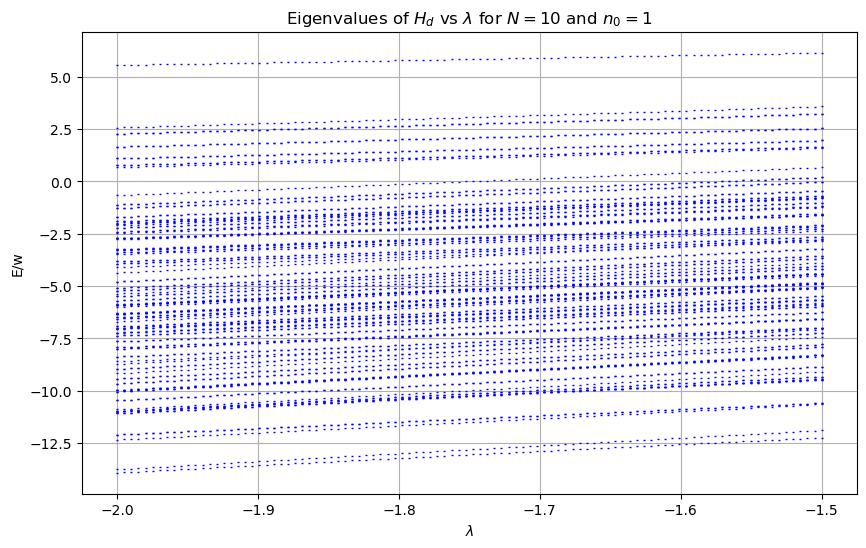

In [9]:
# Plot eigenvalues as a function of lambda
plt.figure(figsize=(10, 6))
for i in range(len(lambda_values)):
    eigenvalues = eigenvalues_list[i]
    plt.plot([lambda_values[i]] * len(eigenvalues), eigenvalues/w, '_', markersize=1, color='blue')
    

plt.xlabel(r'$\lambda$')
plt.ylabel('E/w')
plt.title('Eigenvalues of $H_d$ vs $\lambda$ for $N=10$ and $n_0 = 1$')
plt.grid(True)
plt.show()


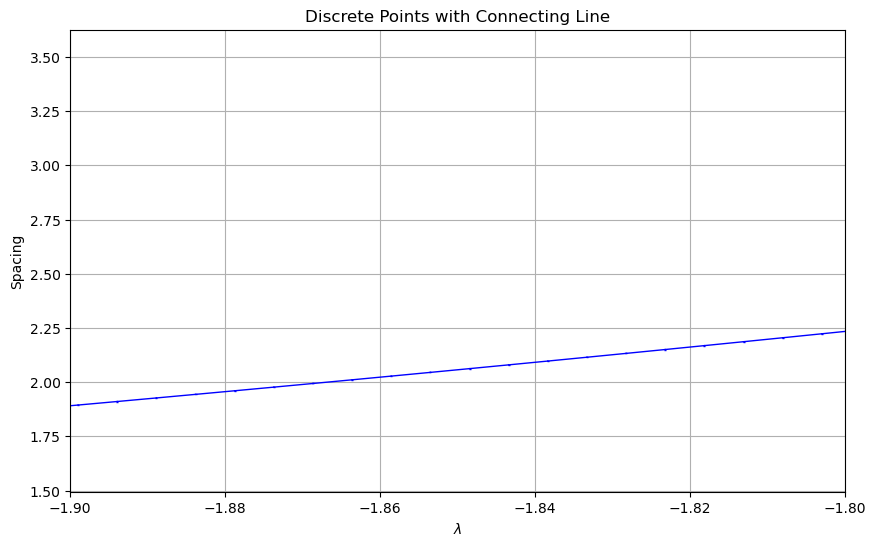

In [10]:
# Plot with a line connecting the points
plt.figure(figsize=(10, 6))
for i in range(len(lambda_values)):
    spacing = diff_list[i]
    plt.plot(lambda_values[i], 10 * spacing / w, '_', markersize=1, color='blue')

    # Add a line connecting the points
    if i > 0:
        plt.plot([lambda_values[i - 1], lambda_values[i]], [10 * diff_list[i - 1] / w, 10 * spacing / w], color='blue', linestyle='-', linewidth=1)

plt.xlim([-1.9, -1.8])
#plt.ylim([-0.1, 1.6])
plt.xlabel(r'$\lambda$')
plt.ylabel('Spacing')
plt.title('Discrete Points with Connecting Line')
plt.grid(True)
plt.show()


In [11]:
print(diff_list)

[0.159162057254143, 0.16057539469838922, 0.16199920625740383, 0.16343352806598155, 0.1648783956836457, 0.16633384408495466, 0.16779990764970165, 0.16927662015339173, 0.17076401475770453, 0.17226212400113106, 0.173770979789861, 0.17529061338848884, 0.17682105541125814, 0.1783623358130324, 0.17991448388079867, 0.18147752822504692, 0.18305149677139632, 0.18463641675243458, 0.1862323146996392, 0.18783921643565016, 0.18945714706634753, 0.1910861309735754, 0.19272619180771677, 0.19437735248059695, 0.1960396351586322, 0.19771306125600852, 0.19939765142820143, 0.20109342556578014, 0.20280040278817957, 0.2045186014379503, 0.20624803907501565, 0.2079887324714047, 0.2097406976059233, 0.2115039496592832, 0.21327850300947482, 0.2150643712271112, 0.21686156707136384, 0.21867010248594632, 0.22048998859546387, 0.22232123570170081, 0.2241638532807464, 0.226017849979824, 0.2278832336146035, 0.22976001116682632, 0.23164818878218796, 0.23354777176827213, 0.23545876459309056, 0.2373811708835447, 0.23931499

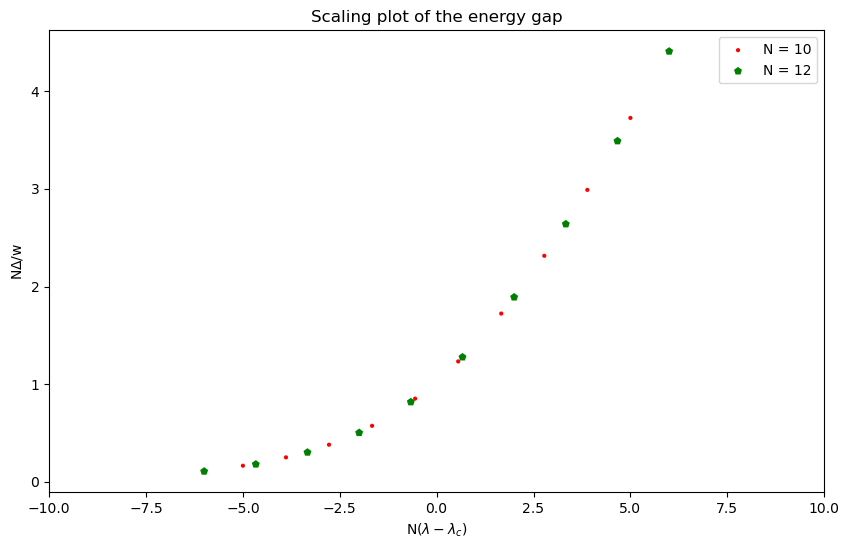

In [12]:
# Sort lambda_values and corresponding spacings

diff_list_10 = [0.03280585797578084, 0.04989460236771848, 0.07587709743300586, 0.11459470687383799, 0.17031667280765106, 0.24656942379702862, 0.3446695607020569, 0.46306951692639053, 0.5981417414244525, 0.7456742069509019]
diff_list_12 = [0.01775651626860153, 0.02985197559678454, 0.050212094845491606, 0.0836747114283547, 0.13618223266322005, 0.21285848599569412, 0.3152136266609187, 0.4401477218432799, 0.5819693188950552, 0.7351223699472271]
#diff_list_14 = [0.1302600687130422, 0.13834523752601768, 0.14680752553129395, 0.15565030551357495, 0.16487564698223522]
w= 1
lambda_c = -1.850
lambda_values = np.linspace(-2.85, -0.85, 10)

plt.figure(figsize=(10, 6))
plt.scatter(5 * (lambda_values - lambda_c), 5 * np.array(diff_list_10) / w, label='N = 10',color='red', marker= '.', edgecolors='none')
plt.scatter(6 * (lambda_values - lambda_c), 6 * np.array(diff_list_12) / w, label='N = 12', color='green', marker = 'p', edgecolors= 'none')
#plt.scatter(14 * (lambda_values - lambda_c), 14 * np.array(diff_list_14) / w, label='N = 14', color='blue')
plt.xlim([-10.0,10.0])
plt.xlabel(r'N($\lambda - \lambda_c)$')
plt.ylabel('N$\Delta$/w')
plt.title('Scaling plot of the energy gap')
plt.grid(False)
plt.legend()
plt.show()



In [11]:
def create_hamiltonian(N, A, lambda_val):
    H = np.zeros((N, N), dtype=float)
    for i in range(N):
        for j in range(N):
            if i == j:
                H[i, j] = lambda_val * matrix_element(A[i], A[j])
            else:
                H[i, j] = d_dag_matrix_element(A[i], A[j]) + d_dag_matrix_element(A[j], A[i])
    return H


In [12]:
from scipy.linalg import eigh_tridiagonal

def ground_state(H):
    eigenvals, eigenvecs =  np.linalg.eigh(H)
    idx = np.argsort(eigenvals)
    ground_state_index = idx[0]
    ground_state_wavefunction = eigenvecs[:, ground_state_index]
    return ground_state_wavefunction

def fidelity(state1, state2):
    return np.abs(np.dot(np.conj(state1), state2)) ** 2

def fidelity_susceptibility(state1, state2, delta_lambda):
    f1 = fidelity(state1, state2)
#    f2 = fidelity(state1, state1)
#    f3 = fidelity(state2, state2)
    return (-2 * np.log(f1)) / (delta_lambda ** 2)

# Define your system parameters and states here

# Range of lambda values to explore
lambda_values = np.linspace(-4.5, 3.5, 30)
delta_lambda = 0.001  # Small change in lambda for fidelity susceptibility

# Lists to store fidelity susceptibilities for each lambda value
susceptibility_values = []
fidelity_values = []

# Loop through lambda values
for i in range(len(lambda_values) - 1):
    lambda_val = lambda_values[i]

    # Create Hamiltonians for current and next lambda values
    H = create_hamiltonian(N, A, lambda_val)
    next_H = create_hamiltonian(N, A, lambda_val+ delta_lambda)

    # Calculate ground states
    state1 = ground_state(H)
    state2 = ground_state(next_H)

    # Calculate fidelity susceptibility
    susceptibility = fidelity_susceptibility(state1, state2, delta_lambda)
    susceptibility_values.append(susceptibility)
    fidelity_val = fidelity(state1,state2)
    fidelity_values.append(fidelity_val)


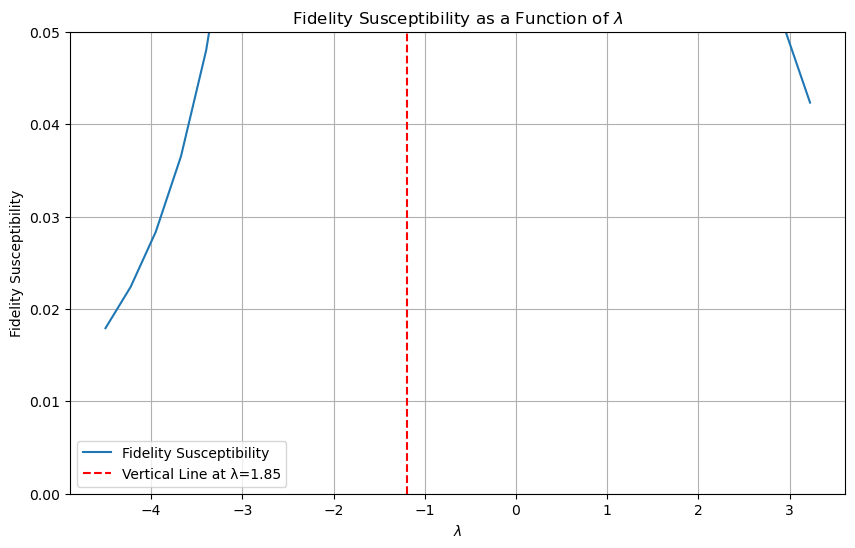

In [20]:
# Plotting the fidelity susceptibility as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values[:-1], susceptibility_values, label='Fidelity Susceptibility')
plt.axvline(x=-1.20, color='r', linestyle='--', label='Vertical Line at λ=1.85')
plt.xlabel(r'$\lambda$')
plt.ylabel('Fidelity Susceptibility')
plt.title('Fidelity Susceptibility as a Function of $\lambda$')
plt.legend()
plt.grid()
plt.ylim(0,0.05)
plt.show()